In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sb
%matplotlib inline

In [2]:
total = pd.read_csv('../data/total/2020-03-08_total.csv')

In [3]:
confirmed = pd.read_csv('../data/individual/2020-03-08_confirmed.csv')
deaths = pd.read_csv('../data/individual/2020-03-08_deaths.csv')
recovered = pd.read_csv('../data/individual/2020-03-08_recovered.csv')
#google_trend = pd.read_csv('data/googleTrendGermany.csv')

In [45]:
confirmed = pd.read_csv('../data/modified_covid/confirmed.csv')
confirmed = confirmed.fillna(0)
deaths = pd.read_csv('../data/modified_covid/deaths.csv')
deaths = deaths.fillna(0)
recovered = pd.read_csv('../data/modified_covid/recovered.csv')
recovered =recovered.fillna(0)

# 2. Data Wrangling and Visualization of COVID-19-data
Lineplot number infected (group_by time)

In [5]:
plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.serif'] = 'Ubuntu'
#plt.rcParams['font.monospace'] = 'Ubuntu Mono'
#plt.rcParams['font.size'] = 20
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 18
#plt.rcParams['xtick.labelsize'] = 10
#plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 14 
plt.rcParams['axes.titlesize'] = 14

color = '#3c4ee0'

In [6]:
def only_nth_tick(n):
    ax = plt.gca()
    temp = ax.xaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::n]))
    for label in temp:
        label.set_visible(False)

(-0.5, 384.5, 3076.5, -0.5)

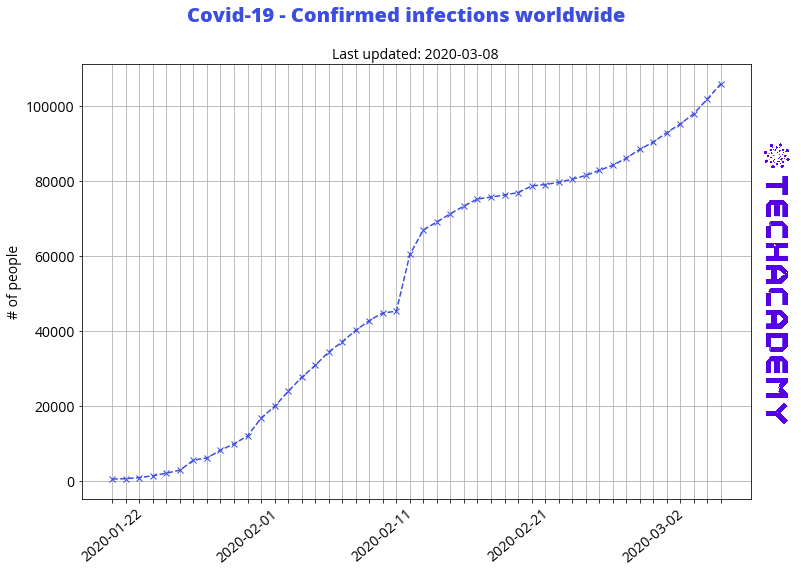

In [7]:
fig = plt.figure(figsize=(12,8))

confirmed = pd.read_csv('../data/modified_covid/confirmed.csv')
confirmed = confirmed.fillna(0)
data = confirmed.groupby(by='time').sum()['confirmed']
#data = confirmed.sum()[2:]
#confirmed.sum()[2:].plot(color=color)
plt.plot(data.index, data.values,'--x', color = color)
#plt.xlabel('date')
plt.ylabel('# of people')
plt.title('Last updated: 2020-03-08 ')
plt.xticks(rotation=40)
only_nth_tick(10)
plt.grid()
plt.suptitle('Covid-19 - Confirmed infections worldwide',color=color,)


import matplotlib.image as image


im = image.imread('../../../Color logo with background.png')
newax = fig.add_axes([0.45, 0.25, 0.5, 0.5], anchor='NE', zorder=-1)
newax.imshow(im)
newax.axis('off')

Stacked Area Plot (Top 5 countries, see Economist). Use group_by country, date and arrange, filter



In [8]:
top6 = confirmed.groupby('country').max()['confirmed'].sort_values(ascending=False).head(6)

In [9]:
top6.index

Index(['Mainland China', 'South Korea', 'Italy', 'Iran', 'France', 'Germany'], dtype='object', name='country')

In [10]:
stack = []
for el in top6.index:
    stack.append(confirmed[confirmed['country']==el].groupby('time').sum()['confirmed'].values)
    
dates = confirmed[confirmed['country']==el].groupby('time').sum()['confirmed'].index

(-0.5, 384.5, 3076.5, -0.5)

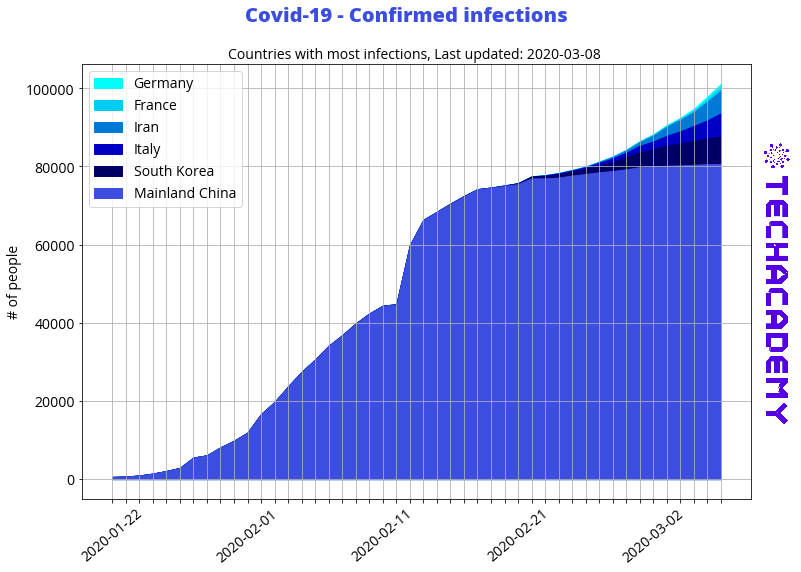

In [43]:
fig = plt.figure(figsize=(12,8))
plt.rcParams
colors = ['#3c4ee0','#000064','#0000c5','#0078d6','#00cdf2','#00fffb']
for i in reversed(range(1,7)):
    plt.fill_between(dates, sum(stack[:i]),label=top6.index[i-1],color=colors[i-1])
plt.legend(loc= 'upper left')


plt.rcParams['image.cmap'] = 'Blues'


plt.ylabel('# of people')
plt.title('Countries with most infections, Last updated: 2020-03-08 ')
plt.xticks(rotation=40)
only_nth_tick(10)
plt.grid()
plt.suptitle('Covid-19 - Confirmed infections',color=color)


import matplotlib.image as image
im = image.imread('../../../Color logo with background.png')
newax = fig.add_axes([0.45, 0.25, 0.5, 0.5], anchor='NE', zorder=-1)
newax.imshow(im)
newax.axis('off')

In [63]:
total = pd.merge(confirmed, deaths, on='id')
total = pd.merge(total, recovered, on='id')

In [77]:
total['netto'] = total['confirmed']- total['deaths']-total['recovered']
total['recovered'] = total['recovered']*-1
total['deaths'] = total['deaths']*-1

In [81]:
data = total[total['country']==el].groupby('time').sum()[['confirmed','deaths','recovered','netto']]

In [93]:
top6.index

Index(['Mainland China', 'South Korea', 'Italy', 'Iran', 'France', 'Germany'], dtype='object', name='country')

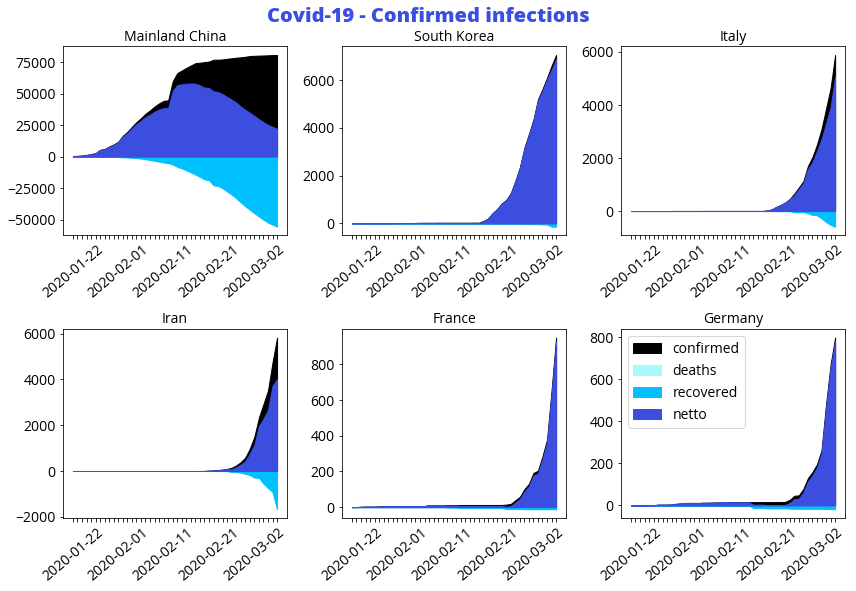

In [128]:
fig = plt.figure(figsize=(12,8))
plt.rcParams
colors = ['#000000','#a6fafb','#00c0fe','#3c4ee0','#00cdf2','#000000']




plt.suptitle('Covid-19 - Confirmed infections',color=color,y=1.02)


for i in range(1,7):
    plt.subplot(2,3,i)
    country= top6.index[i-1]
    data = total[total['country']==country].groupby('time').sum()[['confirmed','deaths','recovered','netto']]
    #plt.ylabel('# of people')
    plt.title(country)
    plt.xticks(rotation=40)
    only_nth_tick(10)
    #plt.grid()
    x = ['confirmed','deaths','recovered','netto']
    for i, el in enumerate(x):
        plt.fill_between(data.index, data[el],color=colors[i],label=el)
    only_nth_tick(10)
plt.legend(loc='upper left')
plt.tight_layout()

In [145]:
data = total.groupby(by='country').max()['netto'].sort_values(ascending=False)

In [154]:
total['recovered'] = total['recovered']*-1
total['deaths'] = total['deaths']*-1

In [170]:
x = total.groupby(by='country').sum()['deaths']/total.groupby(by='country').sum()['confirmed']

In [178]:
total['mort'] = total.groupby(by='country').max()['deaths']/ total.groupby(by='country').max()['confirmed']

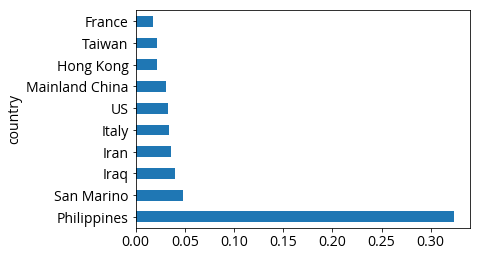

In [180]:
x.sort_values(ascending=False)[:10].plot(kind='barh')

In [238]:
grouped = confirmed.groupby(by='Country/Region').sum()
grouped = grouped.drop(columns=['Lat','Long'])